In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm
import mpl_toolkits.mplot3d.art3d as art3d

import os
import pandas as pd

matplotlib.rcParams['font.family'] = [ 'serif']
matplotlib.rcParams['agg.path.chunksize'] = 10000

In [4]:
import sys  
sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments')
import read_fils as rf

sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/Filament_Metrics' )
import fil_metrics.metric_functions as fm 

skeleton_file_dm = '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments/del_galaxy.NDnet_s5.up.NDskl.BRK.a.NDskl'
filaments_dm = rf.ReadFilament(skeleton_file_dm)
filament_dm_dict = filaments_dm.filament_dict
print(filament_dm_dict) 

header1, ANDSKEL

ndims, 3

Comments, #No comments (RB)

Bounding box, BBOX [-9.46958,-11.2398,-10.2952] [19.1849,19.2268,23.9453]

ncrit, 142
nfils, 90
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Reading filaments took 0.00 secs.
{'ncrit': 142, 'critical_points': [{'cp_idx': 3.0, 'px': 5.24243, 'py': 0.603427, 'pz': 6.55434, 'pair_ID': 29.0, 'boundary': 0.0, 'nfil': 3, 'destID,filID': [[49, 48], [67, 66], [70, 69]], 'Field Vals': [649.3622, 5.034659, 10623.39, 29.0, 2.0, 2.0, 4.026932, 10639.77, 19.0]}, {'cp_idx': 3.0, 'px': 5.72685, 'py': -3.57222, 'pz': 3.31045, 'pair_ID': 18.0, 'boundary': 0.0, 'nfil': 4, 'destID,filID': [[23, 12], [24, 13], [24, 

In [5]:
filament_dm_dict.keys()

dict_keys(['ncrit', 'critical_points', 'nfils', 'filaments', 'nb_CP_fields', 'CP_fields', 'nb_fil_fields', 'fil_fields'])

In [6]:
#separate 'filaments' and 'critical_points' dictionaries (each is now a list of dictionaries)
fils = filament_dm_dict['filaments'] ; crit_points = filament_dm_dict['critical_points'] 

In [7]:
#number of filaments
nfils = filament_dm_dict['nfils'] ; ncrit = filament_dm_dict['ncrit']
print("# of filaments: ",nfils,"\n","# of critical points :",ncrit)

# of filaments:  90 
 # of critical points : 142


In [8]:
voids = fm.dict_slice(crit_points, 'cp_idx',0)     #voids
walls = fm.dict_slice(crit_points, 'cp_idx',1)     #walls
saddles = fm.dict_slice(crit_points, 'cp_idx',2)   #filament saddles
peaks = fm.dict_slice(crit_points, 'cp_idx',3)     #peaks -- nodes! 
bi_points = fm.dict_slice(crit_points, 'cp_idx',4) #bifurcation points

In [9]:
voids

[{'cp_idx': 0.0,
  'px': -4.91502,
  'py': 1.37639,
  'pz': 4.61077,
  'pair_ID': 83.0,
  'boundary': 2.0,
  'nfil': 0,
  'destID,filID': [],
  'Field Vals': [4.316477,
   6.230037,
   0.07231308,
   83.0,
   118.0,
   118.0,
   -1.66146,
   0.02180418,
   863.2]},
 {'cp_idx': 0.0,
  'px': -2.41562,
  'py': -0.494217,
  'pz': -9.45289,
  'pair_ID': 108.0,
  'boundary': 2.0,
  'nfil': 0,
  'destID,filID': [],
  'Field Vals': [-1.0,
   -1.0,
   1.797693e+308,
   108.0,
   -1.0,
   -1.0,
   -0.3277199,
   0.4701973,
   2536.2]},
 {'cp_idx': 0.0,
  'px': -6.38952,
  'py': -3.71422,
  'pz': -3.01,
  'pair_ID': 73.0,
  'boundary': 2.0,
  'nfil': 0,
  'destID,filID': [],
  'Field Vals': [16.93891,
   33.21397,
   4.371126,
   73.0,
   118.0,
   118.0,
   -0.5618652,
   0.2742425,
   3130.2]},
 {'cp_idx': 0.0,
  'px': -2.55205,
  'py': -0.168874,
  'pz': -9.23899,
  'pair_ID': 110.0,
  'boundary': 2.0,
  'nfil': 0,
  'destID,filID': [],
  'Field Vals': [-1.0,
   -1.0,
   1.797693e+308,
   110.

In [10]:
saddles_nfils = fm.cp_nfils(crit_points, 2, 2)

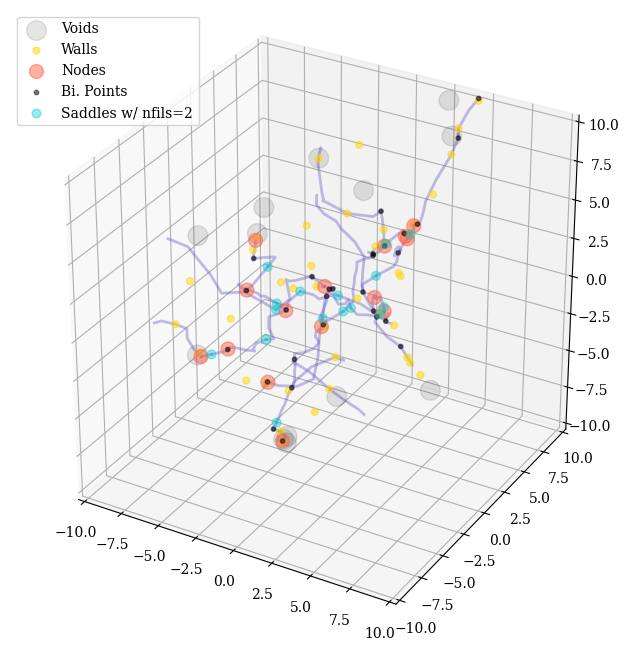

In [11]:
#Make scatter plot 
fig = plt.figure(figsize=[8,8]) ; ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])

for fil_idx in range(nfils): #plots the filaments 
    fm.plot_dm_filament(fil_idx,filament_dm_dict,ax)
#        plots the critical points
x,y,z = fm.cp_plotter(voids) ; ax.scatter(x,y,z, label = 'Voids', c = 'k', s = 200, alpha = 0.1)
x,y,z = fm.cp_plotter(walls) ; ax.scatter(x,y,z, label = 'Walls', s = 25, alpha = 0.5, c = 'gold')
x,y,z = fm.cp_plotter(peaks) ; ax.scatter(x,y,z, label = 'Nodes', s = 100, alpha = 0.5, c = 'tomato')
x,y,z = fm.cp_plotter(bi_points) ; ax.scatter(x,y,z, label = 'Bi. Points', s = 10, alpha = 0.5, c = 'k')
###      saddles
#x,y,z = myfunctions.cp_plotter(saddles) ; ax.scatter(x,y,z, label = 'Saddles', s = 40, alpha = 0.4, c = 'darkturquoise')
#x,y,z = myfunctions.cp_plotter(real_saddles) ; ax.scatter(x,y,z, label = 'Saddles (no boundary)', s = 40, alpha = 0.4, c = 'darkturquoise')
x,y,z = fm.cp_plotter(saddles_nfils) ; ax.scatter(x,y,z, label = 'Saddles w/ nfils=2', s = 40, alpha = 0.4, c = 'darkturquoise')

ax.legend()
extent = 10
ax.set_xlim(-extent,extent)
ax.set_ylim(-extent,extent)
ax.set_zlim(-extent,extent)
plt.show()

### ***Filament Lengths***

In [12]:
fils = filament_dm_dict['filaments'] ; crit_points = filament_dm_dict['critical_points'] 

fils_nfils2 = fm.filaments_nfil2(fils, crit_points)
fils_nfils2

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [13]:
len(fils_nfils2)

32

In [14]:
#get filament half distances 
FHL = fm.Fil_Half_Distances(fils_nfils2)
FHL

array([3.04622387, 3.11229748, 4.46305645, 4.31058284, 1.88053861,
       1.54317677, 1.7629589 , 0.90200784, 0.51346064, 0.35515462,
       3.06344187, 0.95560629, 0.65514096, 2.75730762, 2.87476416,
       0.75524065, 0.98301088, 0.64256679, 6.88707645, 2.27856971,
       2.26929474, 2.0326806 , 2.77129877, 2.32362872, 4.55451502,
       1.76486823, 1.39306017, 1.88171531, 0.54264338, 0.30794771,
       1.47077178, 1.97264631])

Text(0.5, 0, 'Half Length')

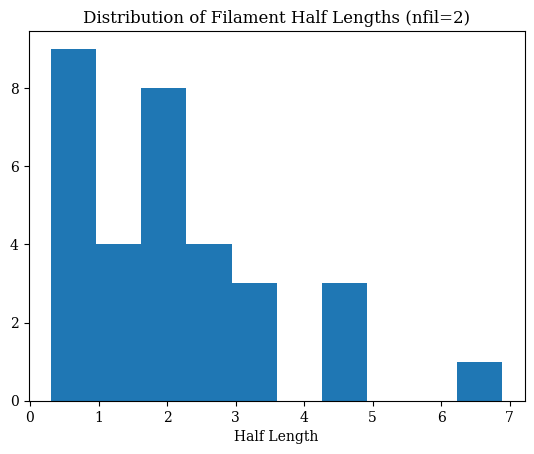

In [15]:
plt.hist(FHL) ; plt.title('Distribution of Filament Half Lengths (nfil=2)')
plt.xlabel('Half Length') 

In [16]:
FHL

array([3.04622387, 3.11229748, 4.46305645, 4.31058284, 1.88053861,
       1.54317677, 1.7629589 , 0.90200784, 0.51346064, 0.35515462,
       3.06344187, 0.95560629, 0.65514096, 2.75730762, 2.87476416,
       0.75524065, 0.98301088, 0.64256679, 6.88707645, 2.27856971,
       2.26929474, 2.0326806 , 2.77129877, 2.32362872, 4.55451502,
       1.76486823, 1.39306017, 1.88171531, 0.54264338, 0.30794771,
       1.47077178, 1.97264631])

In [17]:
FHL[:-1:2]

array([3.04622387, 4.46305645, 1.88053861, 1.7629589 , 0.51346064,
       3.06344187, 0.65514096, 2.87476416, 0.98301088, 6.88707645,
       2.26929474, 2.77129877, 4.55451502, 1.39306017, 0.54264338,
       1.47077178])

In [18]:
FHL[1::2]

array([3.11229748, 4.31058284, 1.54317677, 0.90200784, 0.35515462,
       0.95560629, 2.75730762, 0.75524065, 0.64256679, 2.27856971,
       2.0326806 , 2.32362872, 1.76486823, 1.88171531, 0.30794771,
       1.97264631])

In [19]:
full_fils = FHL[:-1:2] + FHL[1::2] #get full filament lengths by adding every two values together 
full_fils

array([6.15852136, 8.7736393 , 3.42371537, 2.66496674, 0.86861526,
       4.01904815, 3.41244859, 3.63000482, 1.62557766, 9.16564616,
       4.30197534, 5.0949275 , 6.31938324, 3.27477548, 0.85059109,
       3.44341808])

Text(0.5, 0, 'Length')

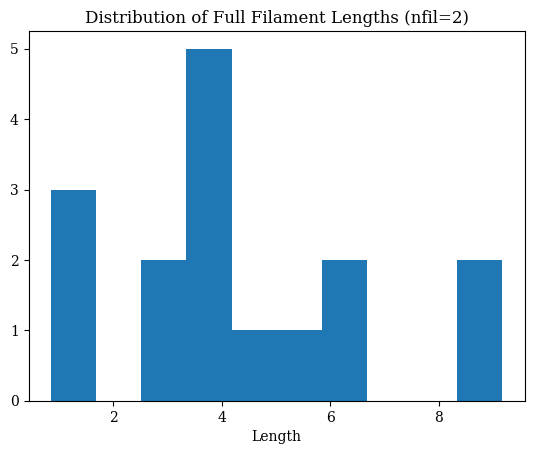

In [20]:
plt.hist(full_fils) ; plt.title('Distribution of Full Filament Lengths (nfil=2)')
plt.xlabel('Length') 

Text(0.5, 0, 'Length')

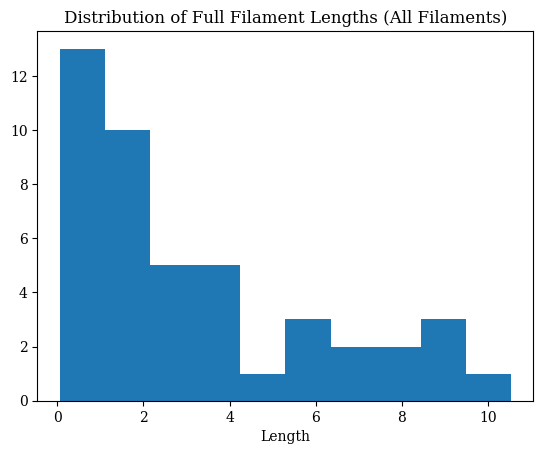

In [21]:
#Find Distribution of ALL filaments (irrespective of if 'nfils'==2)
FHL = fm.Fil_Half_Distances(fils) ;full_fils = FHL[:-1:2] + FHL[1::2]
plt.hist(full_fils) ; plt.title('Distribution of Full Filament Lengths (All Filaments)')
plt.xlabel('Length') 